In [46]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from S00_utils import genVal, genTimeSeries

In [47]:
def plot_wavelet(
    time,
    signal,
    scales,
    waveletname="cmor",
    cmap=plt.cm.seismic,
    title="Wavelet Transform (Power Spectrum) of signal",
    ylabel="Period (years)",
    xlabel="Time",
):
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1.0 / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)

    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(
        time, np.log2(period), np.log2(power), contourlevels, extend="both", cmap=cmap
    )

    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)

    yticks = 2 ** np.arange(
        np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max()))
    )
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)

    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

In [48]:
# dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
# df_nino = pd.read_table(dataset)
# N = df_nino.shape[0]
# t0=1871
# dt=0.25
# time = np.arange(0, N) * dt + t0
# signal = df_nino.values.squeeze()

# scales = np.arange(1, 128)
# plot_wavelet(time, signal, scales)

In [49]:
n = 2
periods = genVal(20, 40, n)
shifts = genVal(0, 100, n)
amps = genVal(0, 3, n)
taus = np.floor(genVal(200, 300, n))
bases = genVal(0, 10, n)

tsArr = []

for period, shift, amp, tau, base in zip(periods, shifts, amps, taus, bases):
    params = dict(period=period, shift=shift, amp=amp, tau=tau, base=base)
    ts = genTimeSeries(params)
    tsArr.append(ts)

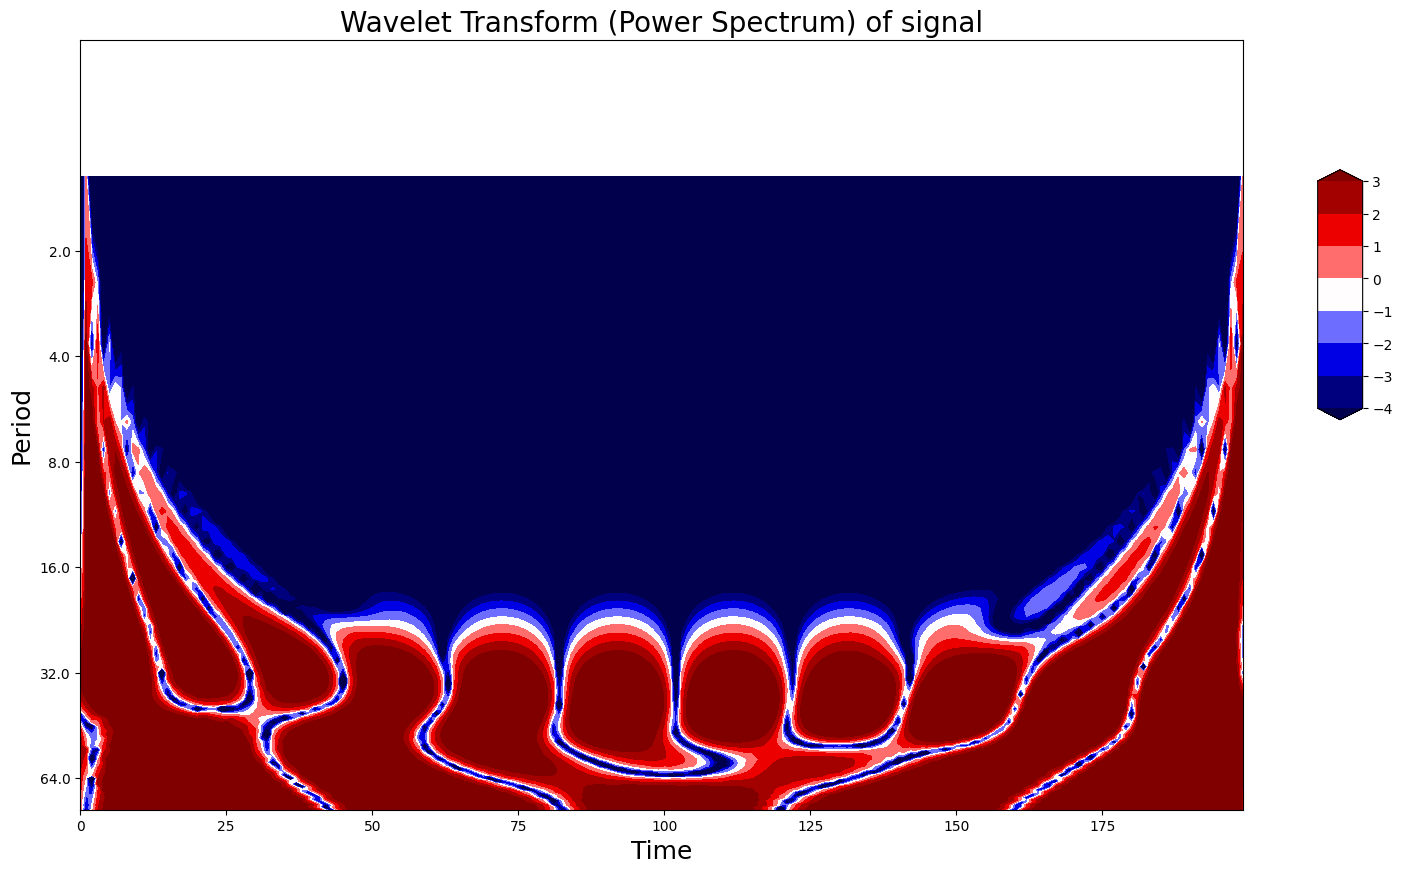

In [53]:
tcf = 200  # Time cut_off
n_scales = 64
#
time = tsArr[0][0][:tcf]
signal = ts_val = tsArr[0][1][:tcf]
scales = np.arange(1, n_scales + 1)
waveletname = "morl"
plot_wavelet(
    time, signal, scales, waveletname=waveletname, xlabel="Time", ylabel="Period"
)

In [54]:
coeff, freq = pywt.cwt(signal[:tcf], scales, waveletname, 1)

In [55]:
print(signal.shape)
print(scales.shape)
print(coeff.shape)

(200,)
(64,)
(64, 200)
